## Brazil Housing
## Business objective:-
#### To analyze and figure out suitable cities for relocation for bachelors,
#### for mid sized families and for large family

### level 1 analysis
##### information of data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
df.shape

(10692, 13)

In [6]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
df.isnull().sum()#There are no null values in the data.

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [9]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [10]:
def seprete_of_types(df):
    continuous=[]
    categorical=[]
    for column in df.columns:
        if df[column].nunique()>40:
            continuous.append(column)
        else:
            categorical.append(column)
    return  categorical,continuous
categorical,continuous=seprete_of_types(df)
table=[categorical,continuous]
print(tabulate({"categorical":categorical,"continuous":continuous},headers=["categorical","continuous"]))
        

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## level 1 (𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝐶𝑎𝑡𝑒𝑔𝑜𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠)

In [11]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [12]:
def info_of_cat(col):
    print(f" unique value of {col} is {df[col].unique()}")
    print (f" the value of mode{col} is {df[col].mode()}")
    print(f" the value of missing {col} is {df[col].isnull().sum()}")

In [13]:
info_of_cat('city')

 unique value of city is ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
 the value of modecity is 0    São Paulo
Name: city, dtype: object
 the value of missing city is 0


In [14]:
info_of_cat('rooms')

 unique value of rooms is [ 2  4  1  3  7  5  8  6 10 13  9]
 the value of moderooms is 0    3
Name: rooms, dtype: int64
 the value of missing rooms is 0


In [15]:
info_of_cat('bathroom')

 unique value of bathroom is [ 1  4  3  2  6  5  7  9  8 10]
 the value of modebathroom is 0    1
Name: bathroom, dtype: int64
 the value of missing bathroom is 0


In [16]:
info_of_cat('parking spaces')

 unique value of parking spaces is [ 1  0  7  4  2  6  3  8  5 10 12]
 the value of modeparking spaces is 0    1
Name: parking spaces, dtype: int64
 the value of missing parking spaces is 0


In [17]:
info_of_cat('animal')

 unique value of animal is ['acept' 'not acept']
 the value of modeanimal is 0    acept
Name: animal, dtype: object
 the value of missing animal is 0


In [18]:
info_of_cat('furniture')

 unique value of furniture is ['furnished' 'not furnished']
 the value of modefurniture is 0    not furnished
Name: furniture, dtype: object
 the value of missing furniture is 0


In [20]:
###São Paulo,Rio de Janeiro most expencive city so filter the data and drop it

In [21]:
 df2=df.drop(df[(df['city']=='Rio de Janeiro') | (df['city']=='São Paulo')].index) 
df2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


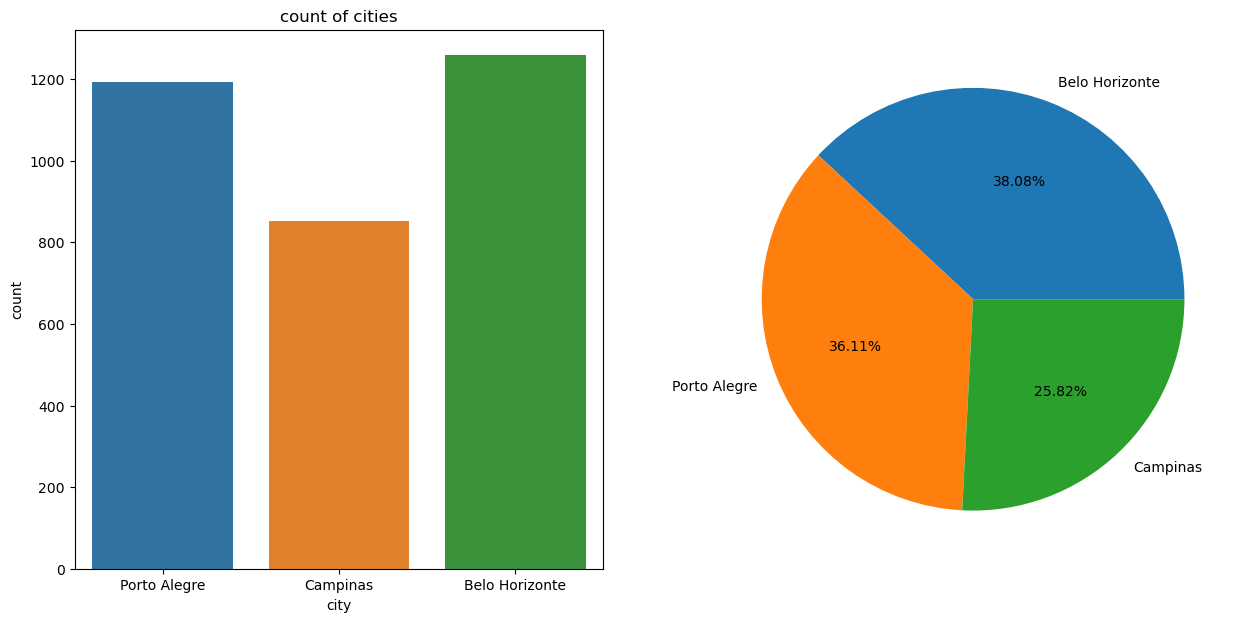

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('count of cities')
percentage=df2['city'].value_counts()
labels=list(df2['city'].value_counts().index)
sns.countplot(x=df2['city'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:- 1.38% of the total population prefer to live in the city of Belo Horizonte

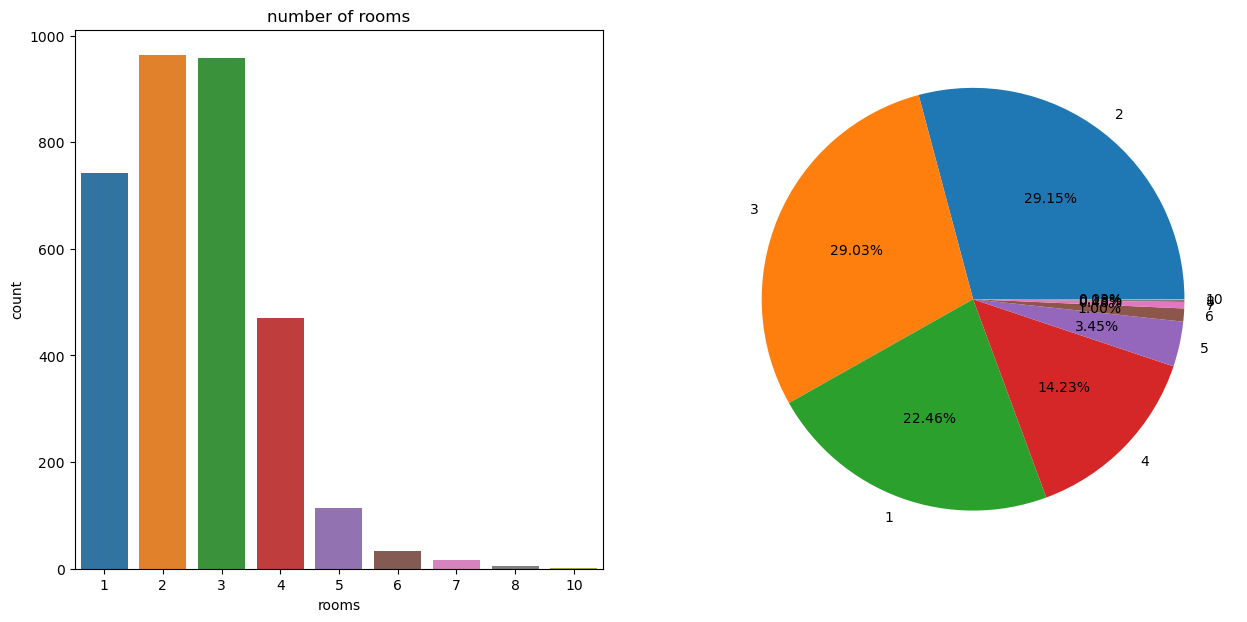

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('number of rooms')
percentage=df2['rooms'].value_counts()
labels=list(df2['rooms'].value_counts().index)
sns.countplot(x=df2['rooms'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-Generally people opt for 2 rooms then 3 rooms

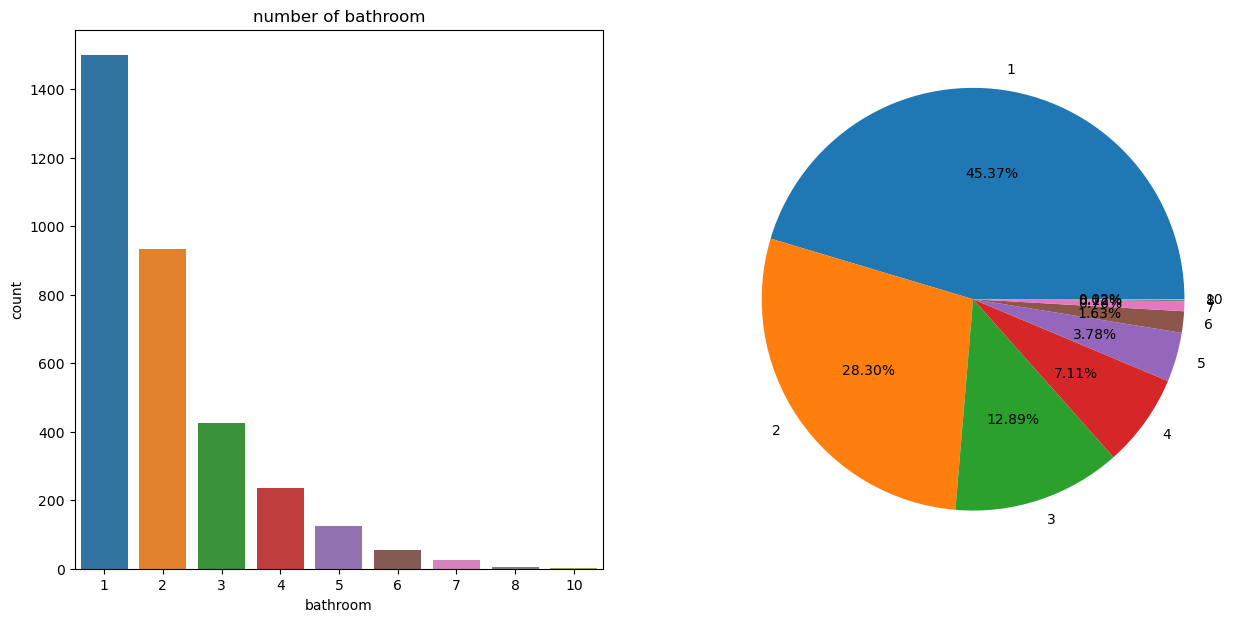

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('number of bathroom')
percentage=df2['bathroom'].value_counts()
labels=list(df2['bathroom'].value_counts().index)
sns.countplot(x=df2['bathroom'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-Most people reveal one bathroom and then 2 and 3

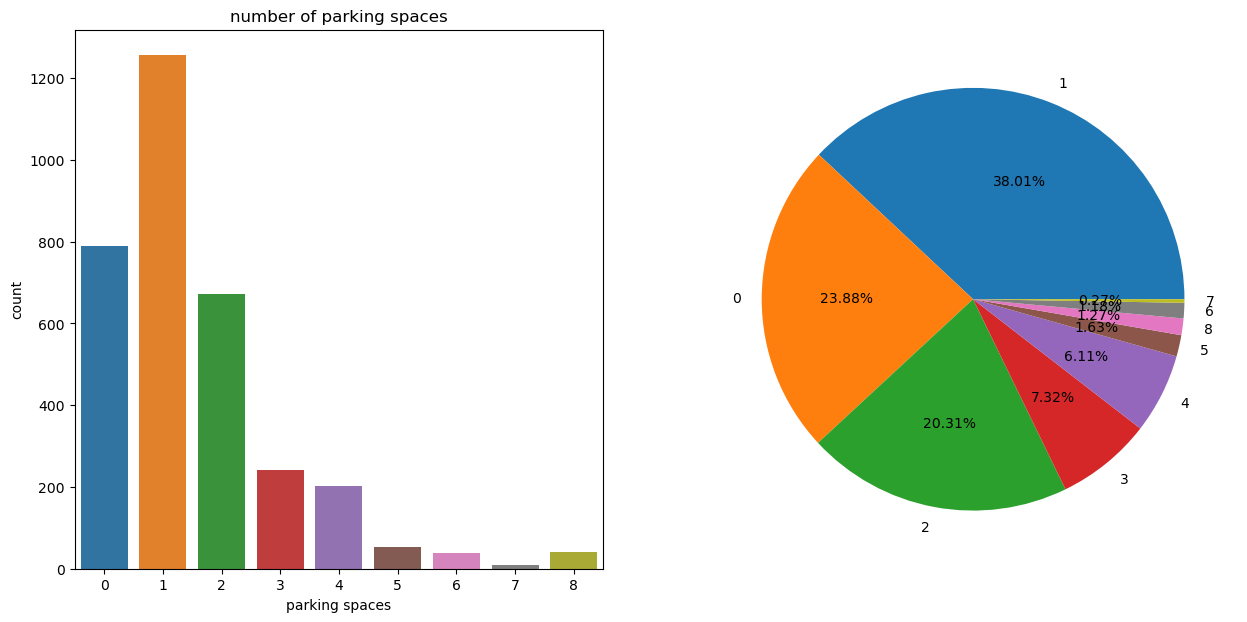

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('number of parking spaces')
percentage=df2['parking spaces'].value_counts()
labels=list(df2['parking spaces'].value_counts().index)
sns.countplot(x=df2['parking spaces'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-. Most people in the city use one or two parking spaces.

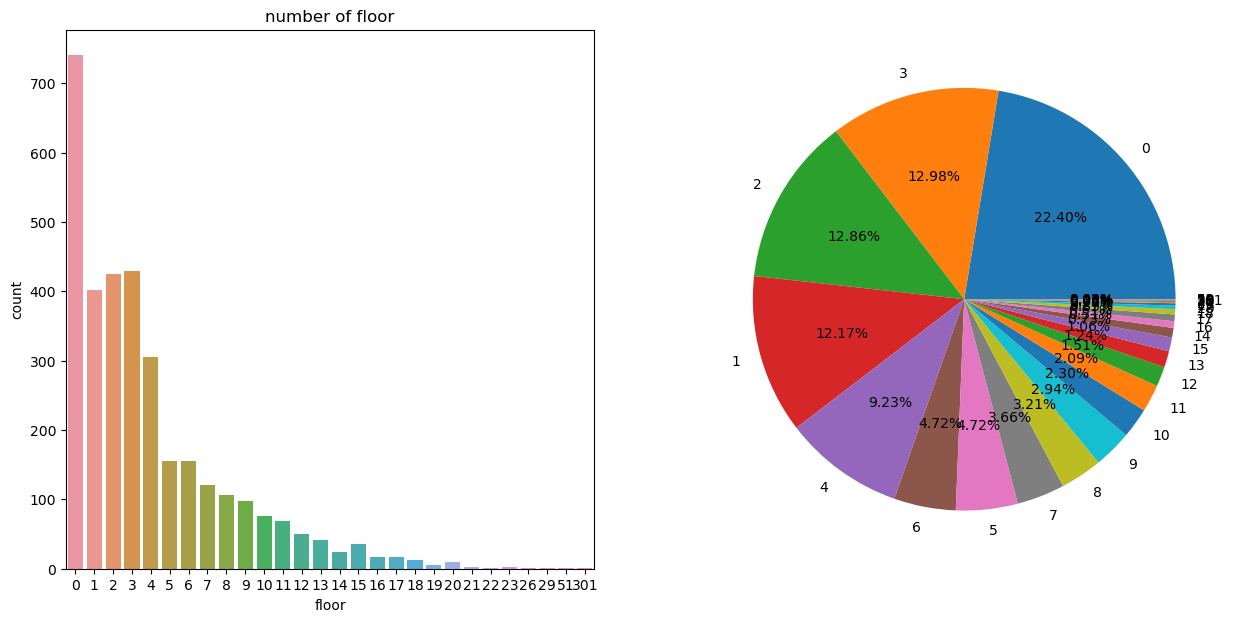

In [26]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('number of floor')
percentage=df2['floor'].value_counts()
labels=list(df2['floor'].value_counts().index)
sns.countplot(x=df2['floor'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-Most of the people prefer houses from zero to 6th floor.

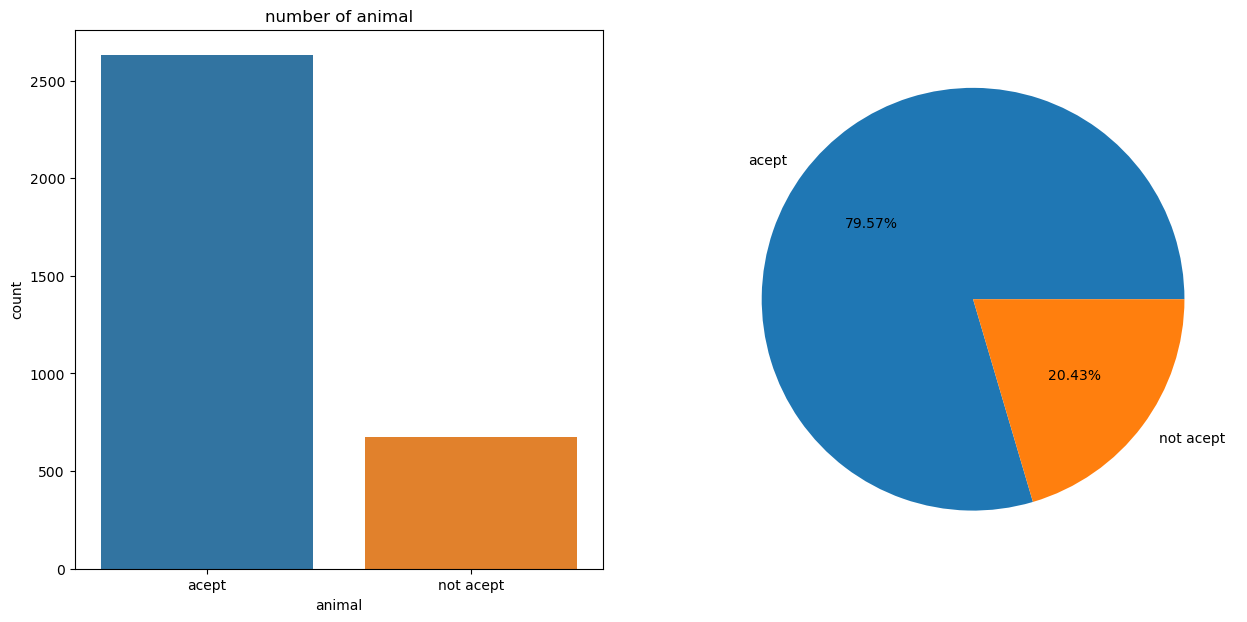

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('number of animal')
percentage=df2['animal'].value_counts()
labels=list(df2['animal'].value_counts().index)
sns.countplot(x=df2['animal'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## interpretation:. 79% people accept animals in cities.

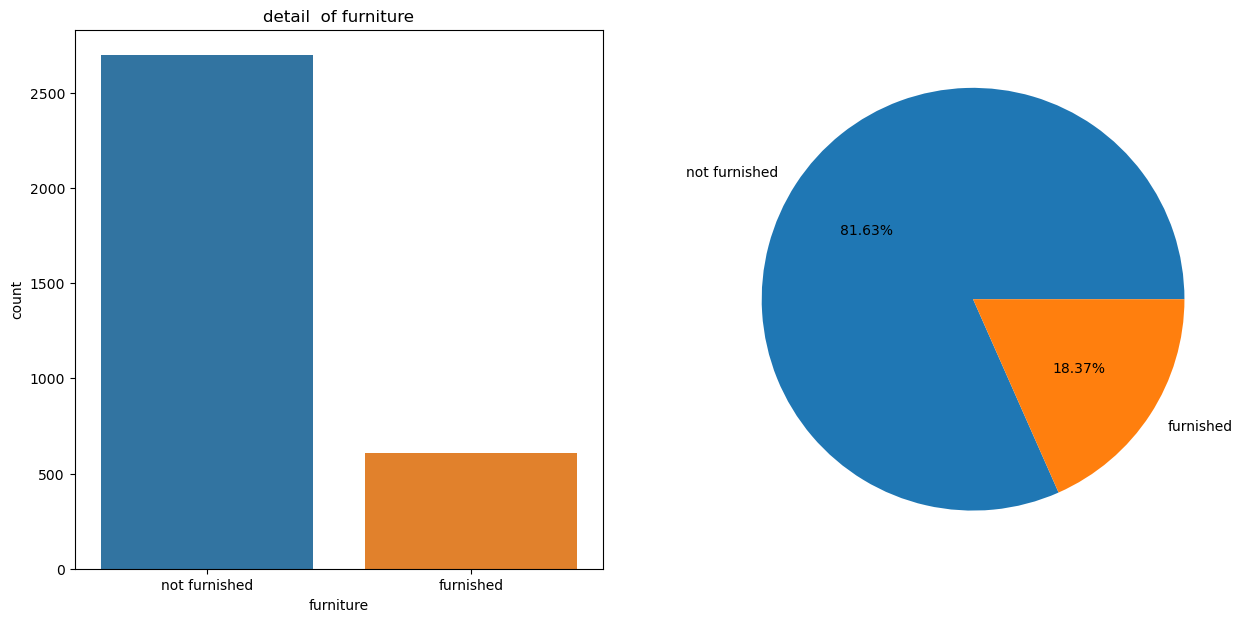

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('detail  of furniture')
percentage=df2['furniture'].value_counts()
labels=list(df2['furniture'].value_counts().index)
sns.countplot(x=df2['furniture'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## Interpretation:-81% houses in various cities are not furnished.

In [29]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [30]:
info_of_numerical('area')

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0


In [31]:
info_of_numerical('hoa (R$)')

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.305248403356
Number of missing values in the hoa (R$) is 0


In [32]:
info_of_numerical('rent amount (R$)')

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


In [33]:
info_of_numerical('property tax (R$)')

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917
Number of missing values in the property tax (R$) is 0


In [34]:
info_of_numerical('fire insurance (R$)')

The mean of the fire insurance (R$) is 53.300879161990274
The median of the fire insurance (R$) is 36.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 47.768030930197206
Number of missing values in the fire insurance (R$) is 0


## Level 2 analysis Numerical columns

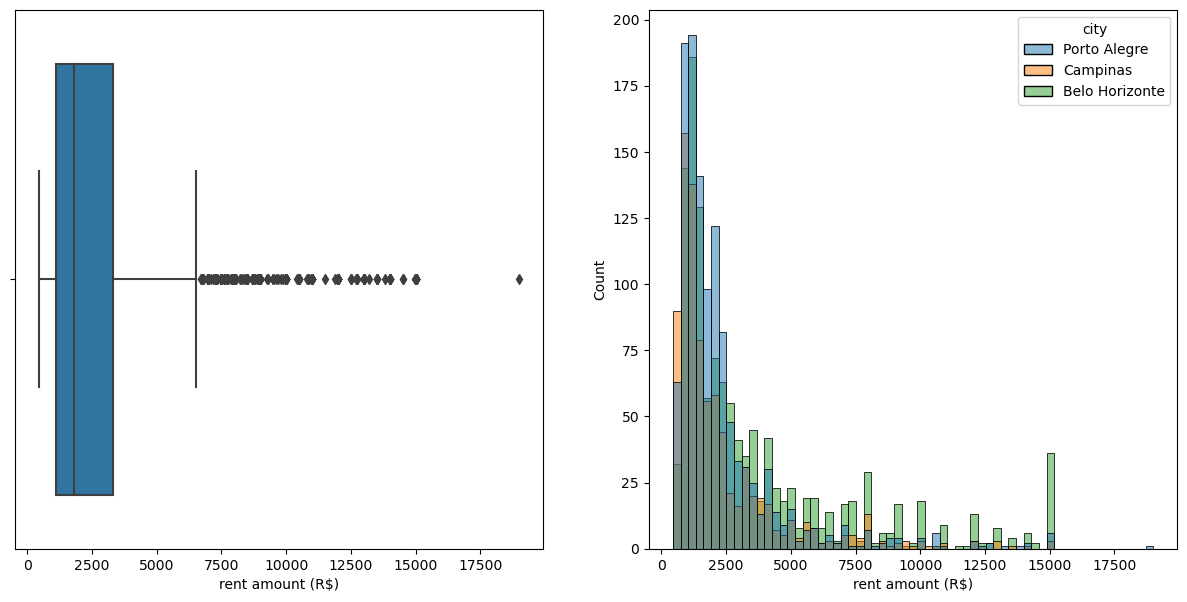

In [35]:
#how the city and rant amount columns are related?
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df2['rent amount (R$)'], hue=df2['city'],ax=ax[0])
sns.histplot(x=df2['rent amount (R$)'],hue=df2['city'],ax=ax[1])
plt.show()

# Outliers Analysis and Treatment:

In [36]:
Q1 = df2['rent amount (R$)'].quantile(0.25)
Q3 =  df2['rent amount (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df2[(df2['rent amount (R$)'] < lower_bound) | (df2['rent amount (R$)'] > upper_bound)]

# Print or further analyze the outliers
print("Outliers:")
print(outliers)

Outliers:
                 city  area  rooms  bathroom  parking spaces  floor  \
15           Campinas   330      4         6               6      0   
37     Belo Horizonte    80      3         2               1      0   
91       Porto Alegre   350      4         4               4      0   
93     Belo Horizonte   296      4         3               2      0   
114    Belo Horizonte   133      4         4               3      6   
...               ...   ...    ...       ...             ...    ...   
10530  Belo Horizonte   230      3         4               4     17   
10532  Belo Horizonte   400      6         4               0      0   
10563  Belo Horizonte   274      4         5               5     10   
10567        Campinas   270      3         3               5      0   
10590  Belo Horizonte   350      5         2               7      0   

          animal      furniture  hoa (R$)  rent amount (R$)  \
15         acept      furnished       680              8000   
37         

In [37]:
mean = int(df2['rent amount (R$)'].mean())
# accessing the data higher than 6
x = df2[df2['rent amount (R$)'] >3500].index
for index in x:
    df2.loc[index, 'rent amount (R$)'] = mean

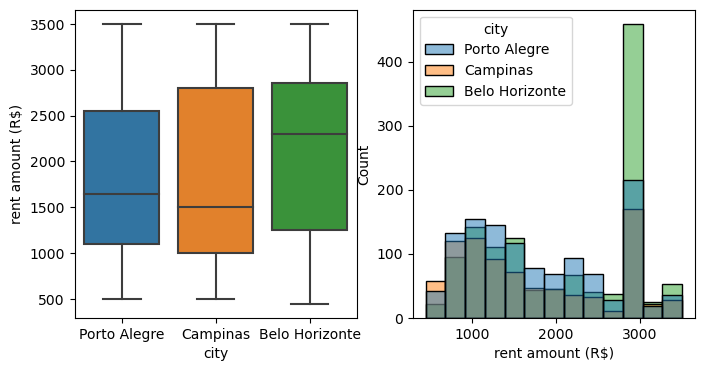

In [38]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x='city', y='rent amount (R$)', data=df2, ax=ax[0])
sns.histplot(x=df2['rent amount (R$)'],hue=df2['city'],ax=ax[1])
plt.show()

## Interpretation:-Majority of the rant amount are falls in the range between 1000 to 2500

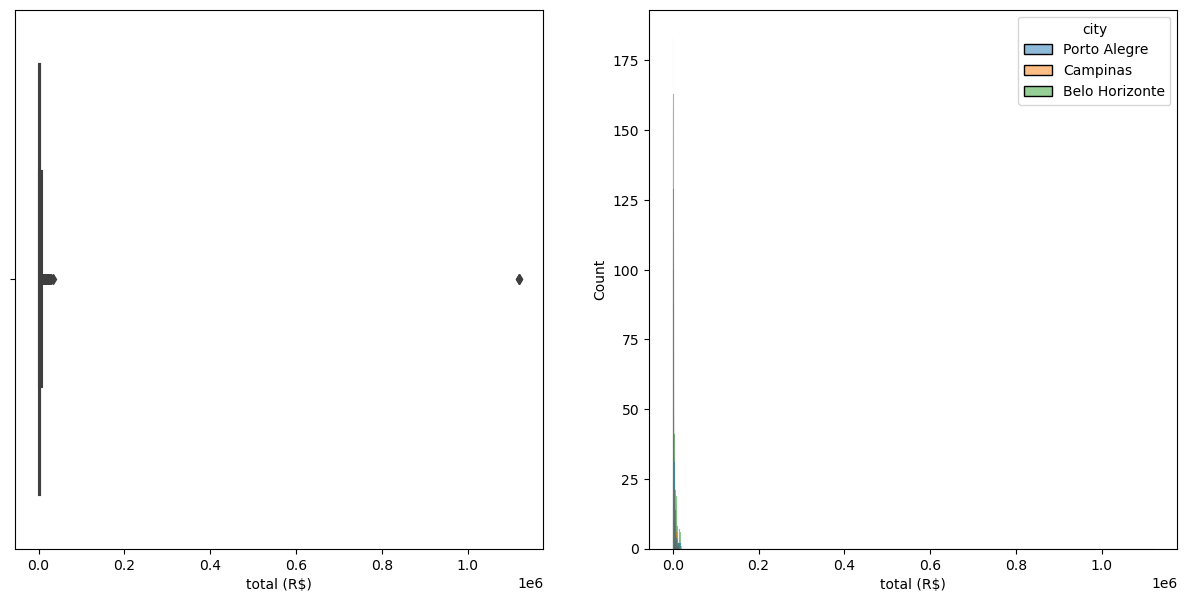

In [39]:
# city and total amount
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x=df2['total (R$)'], hue=df2['city'],ax=ax[0])
sns.histplot(x=df2['total (R$)'],hue=df2['city'],ax=ax[1])
plt.show()


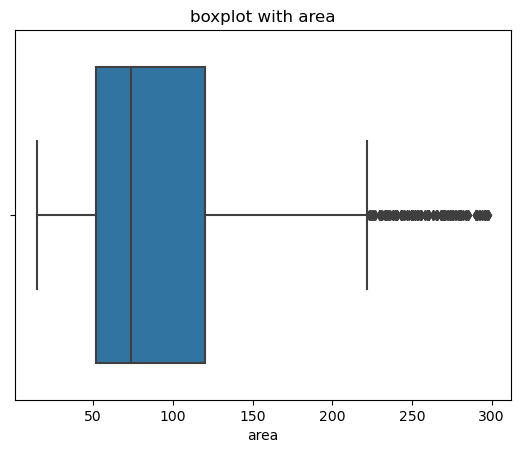

In [40]:
data2 =df2[(df2['area'] <300)]
data2
figsize = (10,3)
sns.boxplot(x =data2['area'])
plt.title(f"boxplot with area")
plt.show()

### interpretation:-Many people are preferring  the area between 50 to 150.

In [41]:
df2['total (R$)'].mean()

4303.3265738498785

In [42]:
Q1 = df2['total (R$)'].quantile(0.25)
Q3 =  df2['total (R$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df2[(df2['total (R$)'] < lower_bound) | (df2['total (R$)'] > upper_bound)]

# Print or further analyze the outliers
print("Outliers:")
print(outliers)

Outliers:
                 city  area  rooms  bathroom  parking spaces  floor  \
15           Campinas   330      4         6               6      0   
37     Belo Horizonte    80      3         2               1      0   
65           Campinas   300      4         4               3      2   
91       Porto Alegre   350      4         4               4      0   
93     Belo Horizonte   296      4         3               2      0   
...               ...   ...    ...       ...             ...    ...   
10530  Belo Horizonte   230      3         4               4     17   
10532  Belo Horizonte   400      6         4               0      0   
10563  Belo Horizonte   274      4         5               5     10   
10590  Belo Horizonte   350      5         2               7      0   
10645    Porto Alegre   400      4         2               2     15   

          animal      furniture  hoa (R$)  rent amount (R$)  \
15         acept      furnished       680              2849   
37         

In [43]:
mean = int(df2['total (R$)'].mean())
# accessing the data higher than 6
x = df2[df2['total (R$)'] >3500].index
for index in x:
    df2.loc[index, 'total (R$)'] = mean

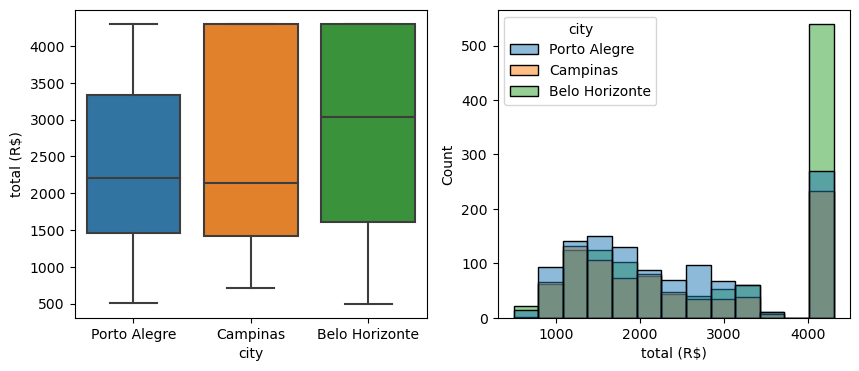

In [44]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(x='city', y='total (R$)', data=df2, ax=ax[0])
sns.histplot(x=df2['total (R$)'],hue=df2['city'],ax=ax[1])
plt.show()


## interpretation:-Total amount is between 250 to 1300.


## level 2 analysis

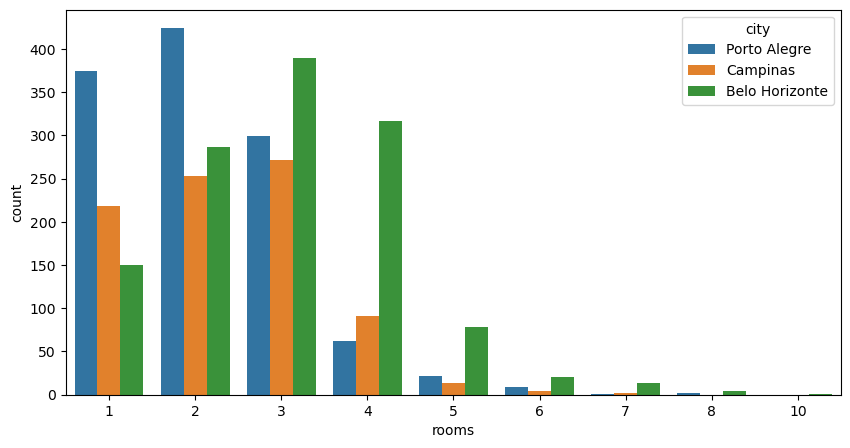

In [45]:
# city and rooms
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df2['rooms'],hue=df2['city'])
plt.show()

### interpretation:-the City ‘Porto Alegra’ Is Having The Higher Number For Houses With Room 1 Bhk And Also Room 2 Bhk .’Belo Horizonte ‘ Is Having Higher Number Of Houses With Room 3 And Also With Room 4.

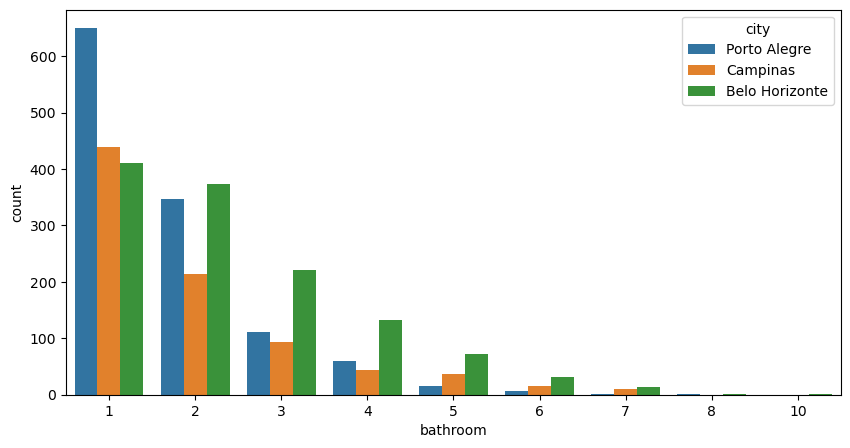

In [46]:
# city and bathroom
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df2['bathroom'],hue=df2['city'])
plt.show()

### interpretation:-the city ‘ porto alegre ‘ is having the higher number of houses with 1 bathroom ‘belo horizonte ‘ is having higher no of houses with 2 bathroom 

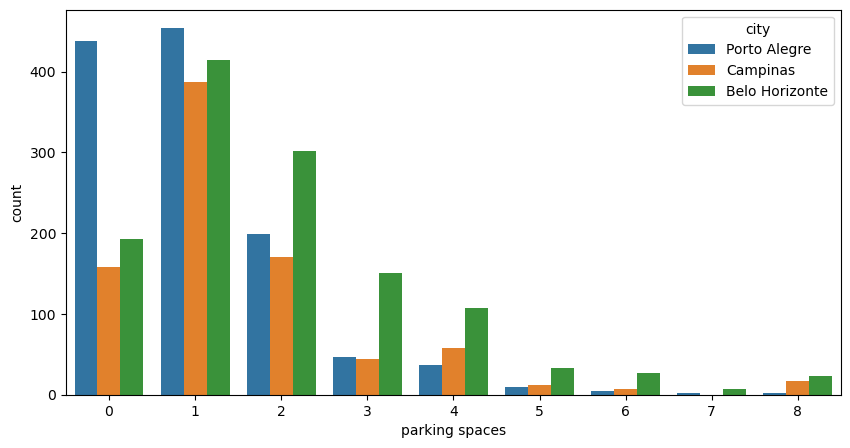

In [47]:
# city and parking spaces
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df2['parking spaces'],hue=df2['city'])
plt.show()


### Interpretation:-the city porto alegre having the higher no of houses which accept pets


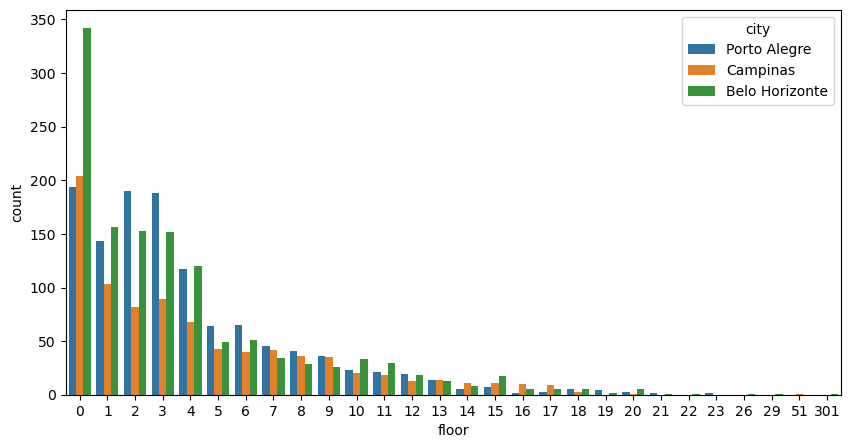

In [50]:
# city and floor
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df2['floor'],hue=df2['city'])
plt.show()


### Interpretation:-’belo horizonte is having higher number of houses and also with 1 floor . The city ‘ porto alegre ‘ is having the higher number for houses with 2 floor.


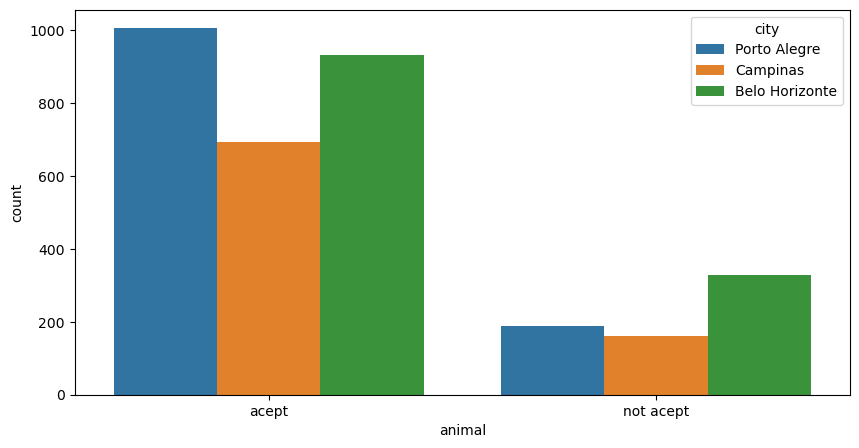

In [49]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df2['animal'],hue=df2['city'])
plt.show()


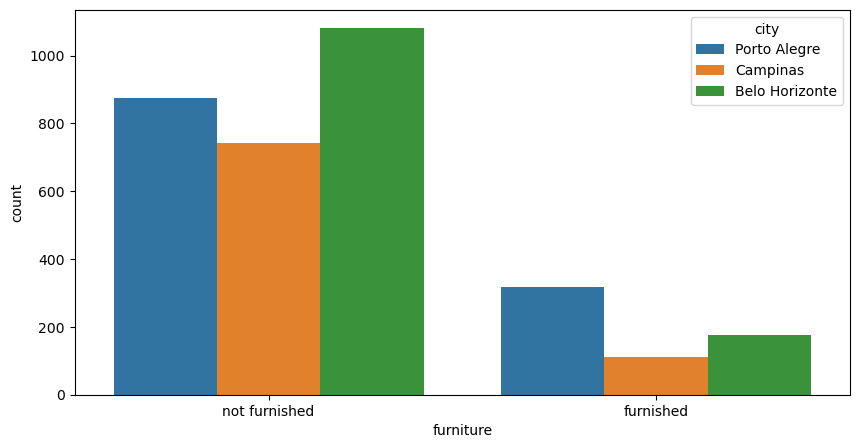

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df2['furniture'],hue=df2['city'])
plt.show()


### Interpretation:-belo horizonte is having higher number of houses which is not furnished ‘porto alegre ‘ is having the more number for houses which is furnished compared to the other cities.

##  level 3 analysis:-


## for bachelors

In [55]:
df3=df2[(df2['rooms']==1) & (df2['bathroom']==1) &(df2['parking spaces']==0)&(df2['rent amount (R$)']<=5000)&(df2['animal']=='acept')&(df2['furniture']=='furnished')]

In [56]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

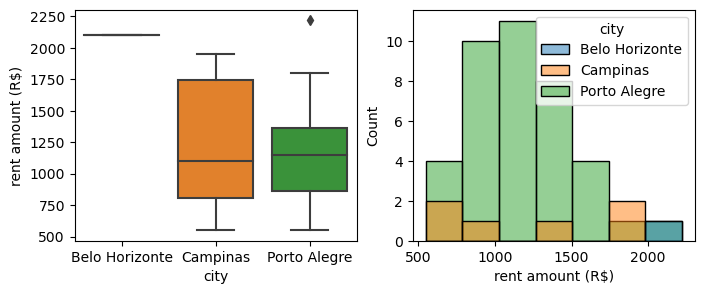

In [57]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
sns.boxplot(x='city', y='rent amount (R$)', data=df3, ax=ax[0])
sns.histplot(x=df3['rent amount (R$)'],hue=df3['city'],ax=ax[1])
plt.show()

#### Interpretation:-from The Histogram And Box Plot Analysis ,Can Identify Outliers Are Present For The ‘Rent Amount ‘Column So After Finding The Mean Value And Treated The Outliers With Mean For The City ‘Porto Alegre’ The Rent Amount Is Between 1300 To 2500 And For The City Campinas The Rent Amount Is In Between 1000 To 2600 And For Belo Horizonte It Is In Between 1800 To 3800.


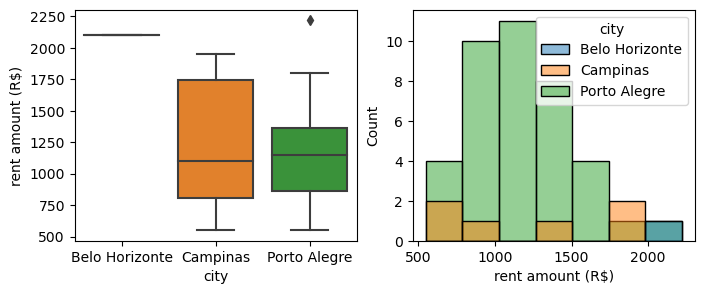

In [58]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
sns.boxplot(x='city', y='rent amount (R$)', data=df3, ax=ax[0])
sns.histplot(x=df3['rent amount (R$)'],hue=df3['city'],ax=ax[1])
plt.show()

### Interpretation:-for bachelors ,data filter for room 1 and bathroom 1 and 1 parking space and  for the city porto alegre is having the higher number  of houses with rent amount is between 1100 to 1500 . For the city campinas is having houses with rant amount in between 900 to 1300 and for bolo horizonte its in between 1000 to 1400.


## for midsize family

In [59]:
df4=df2[(df2['rooms']==2) & (df2['bathroom']==2) &(df2['parking spaces']==1)]

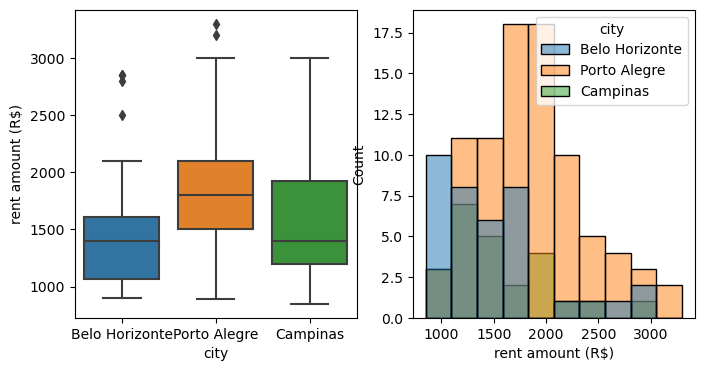

In [60]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x='city', y='rent amount (R$)', data=df4, ax=ax[0])
sns.histplot(x=df4['rent amount (R$)'],hue=df4['city'],ax=ax[1])
plt.show()

### Interpretation:-for mid-sized families data filter for room 2 and parking space 1 and bathroom with  2  and for the city porto alegre is having the higher number of houses with rant amount in between 2000 to 2700 for the city campinas is having rant amount in between  1600 to 2500 and for belo horizonte its in between 1500 to 2100.


## for large family

In [61]:
 df5=df2[(df2['rooms'].isin([3, 4])) & 
    (df2['bathroom'].isin([3, 4]))  & 
    (df2['parking spaces']==2)]

In [62]:
df['animal']

0            acept
1            acept
2            acept
3            acept
4        not acept
           ...    
10687    not acept
10688        acept
10689    not acept
10690        acept
10691        acept
Name: animal, Length: 10692, dtype: object

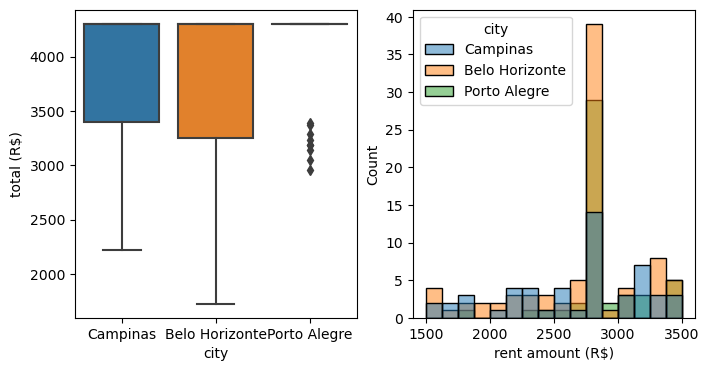

In [63]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x='city', y='total (R$)', data=df5, ax=ax[0])
sns.histplot(x=df5['rent amount (R$)'],hue=df5['city'],ax=ax[1])
plt.show()

## interpretation:-data filtered for room 3 or 4 and bathroom 3,4 and for the city belo horizonte is having the higher number of houses with rant amount in between 3000 to 6000 and for the city compinas is having houses with rant amount in between 3000 to 5000 and for porto alegre its in between 4000 to 6000.

### final interpretation:-

In [ ]:
### 1 for bachelors , the city porto alegre is more convenient to get the houses with the requirement in  less then amount of rent amount
2. For mid-sized families  the city porto alegre is more convenient to get the houses with the requirement in less amount of rent amount 
3.For large families ,the city belo horizonte is more convenient to get the houses with the requirement in appropriate amount of rent amount 
